### ChurnPrediction

In [3]:
!pip install pandas
import pandas as pd



  Using cached pandas-2.0.3-cp38-cp38-macosx_10_9_x86_64.whl.metadata (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 19.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 19.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 20.9 MB/s eta 0:00:00


In [4]:
data=pd.read_csv('Churn_Modelling.csv')
df=data.copy()

FileNotFoundError: [Errno 2] No such file or directory: 'Churn_Modelling.csv'

In [112]:
import pandas as pd


In [113]:
from IPython.display import display

display("Head:")
display(df.head())

# Display the output of each method
display("Info:")
display(df.info())

display("Describe:")
display(df.describe())



'Head:'

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


'Info:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None

'Describe:'

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [114]:
def valueCount(feature):
    return df[feature].value_counts()

display(valueCount('Gender'))
print()

display(valueCount('Geography'))
print()

print('Exited Customer')
display(valueCount('Exited'))

df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

Male      5457
Female    4543
Name: Gender, dtype: int64

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


Exited Customer


0    7963
1    2037
Name: Exited, dtype: int64

In [115]:
df=pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=False)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [116]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ...,  1.73494238,
        -0.91324755,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57638802,
         1.09499335, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ..., -0.57638802,
        -0.91324755,  0.91324755]])

In [118]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [136]:
model = Sequential()

model.add(Dense(3, activation='sigmoid', input_dim=13)) # Dense = Dense Layer, 3 is the number of nodes( This is the hidden layer)
model.add(Dense(1, activation='sigmoid')) # Output Layer


'''
To Change the parameters and architecture of the neural network

model.add(Dense(13, activation='relu', input_dim=13)) # Input Layer &  Hidden Layer
model.add(Dense(13, activation='relu')) # Hidden Layer added one more
model.add(Dense(1,activation='sigmoid')) # Output Layer
'''





In [120]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 3)                 42        
                                                                 
 dense_33 (Dense)            (None, 1)                 4         
                                                                 
Total params: 46 (184.00 Byte)
Trainable params: 46 (184.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [121]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [122]:
history=model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2) # The first 2 are on the whole data and the later 2 are on the split data

Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5682 - accuracy: 0.7950 - val_loss: 0.5431 - val_accuracy: 0.7969
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5254 - accuracy: 0.7958 - val_loss: 0.5206 - val_accuracy: 0.7969
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5125 - accuracy: 0.7958 - val_loss: 0.5137 - val_accuracy: 0.7969
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5088 - accuracy: 0.7958 - val_loss: 0.5112 - val_accuracy: 0.7969
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5076 - accuracy: 0.7958 - val_loss: 0.5097 - val_accuracy: 0.7969
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5069 - accuracy: 0.7958 - val_loss: 0.5088 - val_accuracy: 0.7969
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5066 - accuracy: 0.7958 - val_loss: 0.5082 - val_accuracy: 0.7969
Epoch 

In [123]:
model.layers[0].get_weights() # The Calculated Weights and Bias in layer 0

[array([[ 0.27428028,  0.10501911, -0.0419173 ],
        [ 0.40702972, -0.2001883 , -0.18715405],
        [ 0.43624255, -0.100379  , -0.02925475],
        [ 0.57148534, -0.05512057,  0.4900644 ],
        [-0.00232515,  0.03380612, -0.22614993],
        [-0.10077015,  0.11948679,  0.3453589 ],
        [ 0.44062328, -0.16416906,  0.12987874],
        [-0.70687616,  0.3249687 ,  0.5558019 ],
        [ 0.16844943, -0.12633921,  0.48926756],
        [ 0.21095349, -0.22357644, -0.43132615],
        [ 0.28808212, -0.37414497, -0.515253  ],
        [ 0.08487242,  0.20704304,  0.34061393],
        [-0.08730858,  0.00908929,  0.2038339 ]], dtype=float32),
 array([ 0.4841774 ,  0.4273551 , -0.20619465], dtype=float32)]

In [124]:
y_log=model.predict(X_test_scaled) # It is now giving predictions
y_log

63/63 [==============================] - 0s 1ms/step


array([[0.22536415],
       [0.2194777 ],
       [0.21657367],
       ...,
       [0.18573312],
       [0.21264374],
       [0.21620743]], dtype=float32)

In [125]:
import numpy as np
y_pred=np.where(y_log>0.5,1,0) # Values greater than 0.5 will be 1 and less than that will be 0

In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred) # This is the accuracy of the model

0.7975

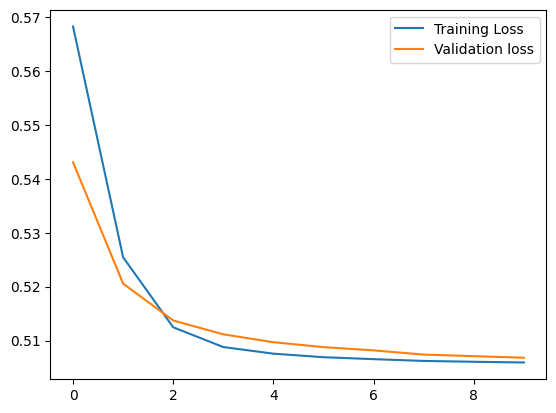

In [134]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')

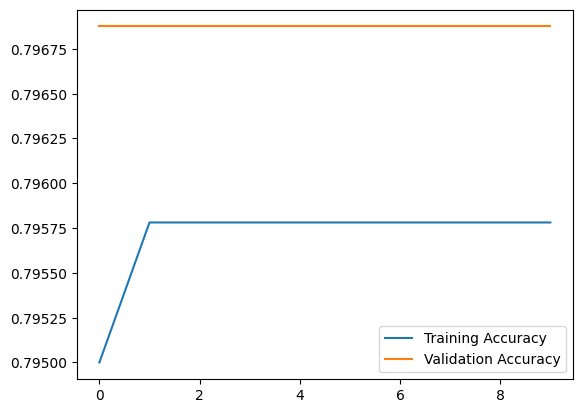

In [133]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
